In [1]:
#  Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# model importing
from sklearn.linear_model import LinearRegression

#time stamp
import time
print("Last Updated",time.asctime())

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#model testing
from sklearn.metrics import mean_squared_error, r2_score

#split the dataset
from sklearn.model_selection import train_test_split

#preprocessing
from sklearn.preprocessing import LabelEncoder

Last Updated Thu Sep 25 17:15:00 2025


# House Price prediction through machine learning (Regression)

![Machine Learning](assets/ml.png.jpeg)

## 1. Problem Formulation

Buying or selling a house often involves uncertainty in estimating its true market value. Traditional price estimation methods rely heavily on human judgment, which can be subjective and inconsistent. A predictive system that uses property features such as the number of bedrooms, bathrooms, area, location quality, and age of the house can help estimate the house price more accurately. This would assist buyers, sellers, and real estate professionals in making informed decisions.

## 2. Variables

#### Independent Features (Inputs):

* Bedrooms: Numeric feature representing the number of bedrooms.

* Bathrooms: Numeric feature representing the number of bathrooms.

* Area_sqft: Numeric feature representing the total area of the property in square feet.

* Location_Score: Numeric/categorical feature representing the desirability of the location (e.g., proximity to facilities, neighborhood rating).

* Age_years: Numeric feature representing the age of the house in years.


#### Dependent Feature (Target):

* Price: Numeric feature representing the market value of the house (target variable to be predicted).

In [2]:
# Loading the dataset as a dataframe
df=pd.read_csv('datasets/dataset.csv')

## 3. Preparing & Analyzing Data

In [3]:
df.shape

(10000, 6)

In [4]:
df.info

<bound method DataFrame.info of       Bedrooms  Bathrooms  Area_sqft  Location_Score  Age_years   Price
0            2          2       1457               8          9  547932
1            2          3       2202               1          8  535773
2            2          3       3304               7         44  794521
3            2          1       1568              10         42  542427
4            4          2       2100               3         41  603995
...        ...        ...        ...             ...        ...     ...
9995         4          1       2109               7         27  665471
9996         5          3       2923              10         16  980004
9997         3          1       1032              10         21  526058
9998         2          3       1808               4         34  516843
9999         4          2       3280               1         48  710758

[10000 rows x 6 columns]>

In [5]:
df.describe

<bound method NDFrame.describe of       Bedrooms  Bathrooms  Area_sqft  Location_Score  Age_years   Price
0            2          2       1457               8          9  547932
1            2          3       2202               1          8  535773
2            2          3       3304               7         44  794521
3            2          1       1568              10         42  542427
4            4          2       2100               3         41  603995
...        ...        ...        ...             ...        ...     ...
9995         4          1       2109               7         27  665471
9996         5          3       2923              10         16  980004
9997         3          1       1032              10         21  526058
9998         2          3       1808               4         34  516843
9999         4          2       3280               1         48  710758

[10000 rows x 6 columns]>

In [6]:
# Checking for null values
df.isnull().sum()

Bedrooms          0
Bathrooms         0
Area_sqft         0
Location_Score    0
Age_years         0
Price             0
dtype: int64

## Exploratory Data Analysis
#### FREQUENCIES

In [7]:
df.head(1)

,Bedrooms,Bathrooms,Area_sqft,Location_Score,Age_years,Price
0,2,2,1457,8,9,547932


In [8]:
df['Bedrooms'].value_counts()

Bedrooms
5    2043
2    2015
1    2000
4    1999
3    1943
Name: count, dtype: int64

In [9]:
df['Bathrooms'].value_counts()

Bathrooms
2    3379
3    3322
1    3299
Name: count, dtype: int64

In [10]:
df['Location_Score'].value_counts()

Location_Score
10    1045
6     1041
5     1033
7     1027
9     1019
3     1011
8      996
4      962
1      943
2      923
Name: count, dtype: int64

#### RELATIONS BETWEEN FEATURES AND TARGET

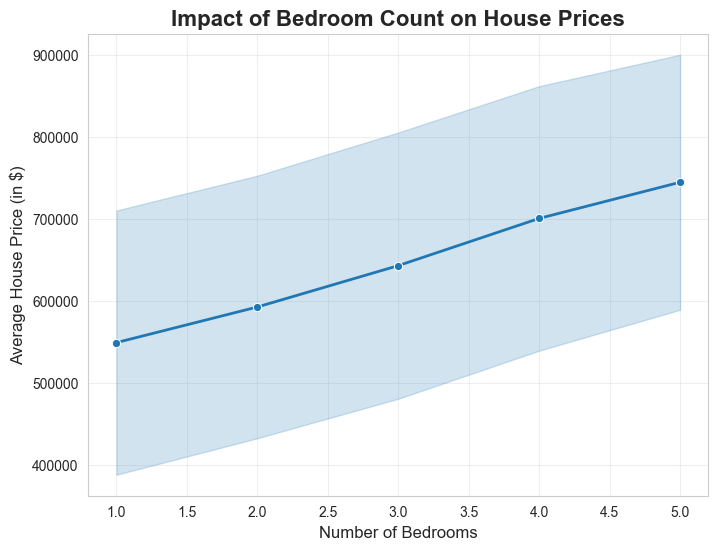

In [61]:
#Bedroom count and Price Line chart
plt.figure(figsize=(8,6))
sns.lineplot(
    data=df, 
    x='Bedrooms', 
    y='Price', 
    marker='o',       # add markers for clarity
    ci='sd',          # show standard deviation bands
    linewidth=2, 
)
# Titles and labels
plt.title("Impact of Bedroom Count on House Prices", fontsize=16, weight='bold')
plt.xlabel("Number of Bedrooms", fontsize=12)
plt.ylabel("Average House Price (in $)", fontsize=12)

# Add grid for readability
plt.grid(alpha=0.3)

# Rotate x-axis ticks if needed
plt.xticks(rotation=0)
plt.savefig('assets/bedroom_price.png')
plt.show()


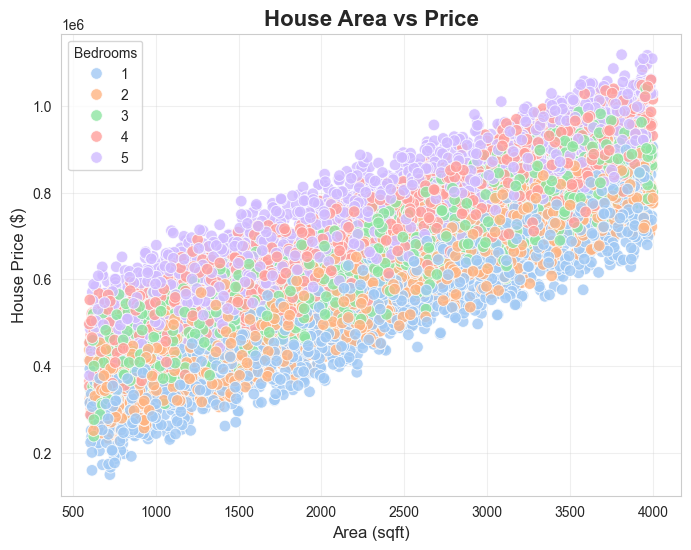

In [62]:
#Hpouse area and Price scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='Area_sqft', 
    y='Price', 
    hue='Bedrooms',           # color code by bedrooms
    palette="pastel", 
    alpha=0.8, 
    s=70
)

plt.title("House Area vs Price", fontsize=16, weight='bold')
plt.xlabel("Area (sqft)", fontsize=12)
plt.ylabel("House Price ($)", fontsize=12)
plt.grid(alpha=0.3)
plt.savefig('assets/Area_price.png')
plt.show()


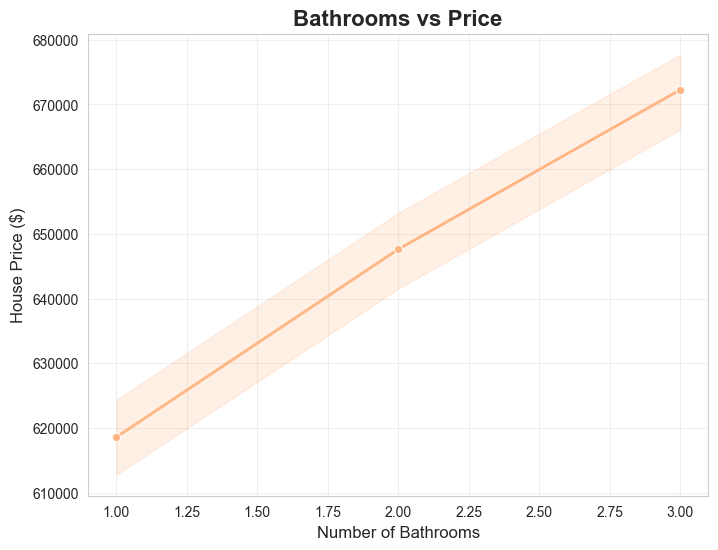

In [63]:
# Bathroom count an price line chart
plt.figure(figsize=(8,6))
sns.lineplot(
    data=df, 
    x='Bathrooms', 
    y='Price', 
    marker='o', 
    linewidth=2,
    color=sns.color_palette("pastel")[1]
)

plt.title("Bathrooms vs Price", fontsize=16, weight='bold')
plt.xlabel("Number of Bathrooms", fontsize=12)
plt.ylabel("House Price ($)", fontsize=12)
plt.grid(alpha=0.3)
plt.savefig('assets/Bathrooms_price.png')

plt.show()


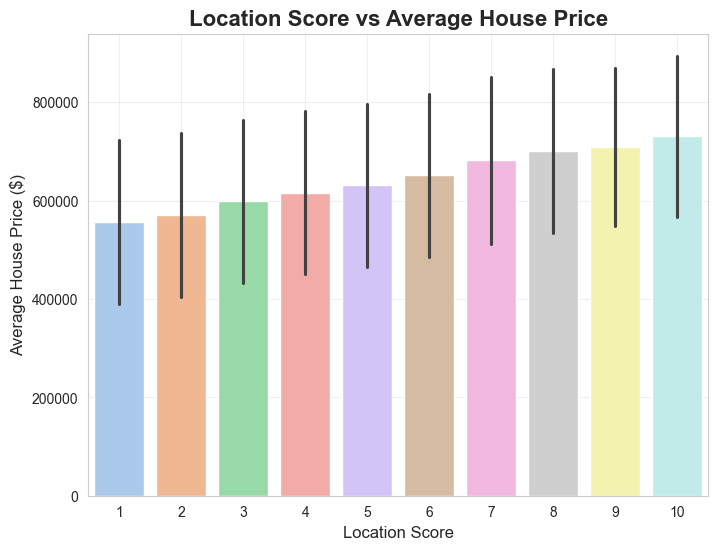

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(
    data=df, 
    x='Location_Score', 
    y='Price', 
    palette=sns.color_palette("pastel"), 
    ci="sd"   # shows variability
)

plt.title("Location Score vs Average House Price", fontsize=16, weight='bold')
plt.xlabel("Location Score", fontsize=12)
plt.ylabel("Average House Price ($)", fontsize=12)
plt.grid(alpha=0.3)
plt.savefig('assets/LocScore_price.png')

plt.show()


In [ ]:
# Age of house and price scatterplotplt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='Age_years', 
    y='Price', 
    color=sns.color_palette("pastel")[3], 
    alpha=0.7, 
    s=70
)

plt.title("Age of House vs Price", fontsize=16, weight='bold')
plt.xlabel("Age of House (years)", fontsize=12)
plt.ylabel("House Price ($)", fontsize=12)
plt.grid(alpha=0.3)
plt.savefig('asssets/age_Price.png')

plt.show()


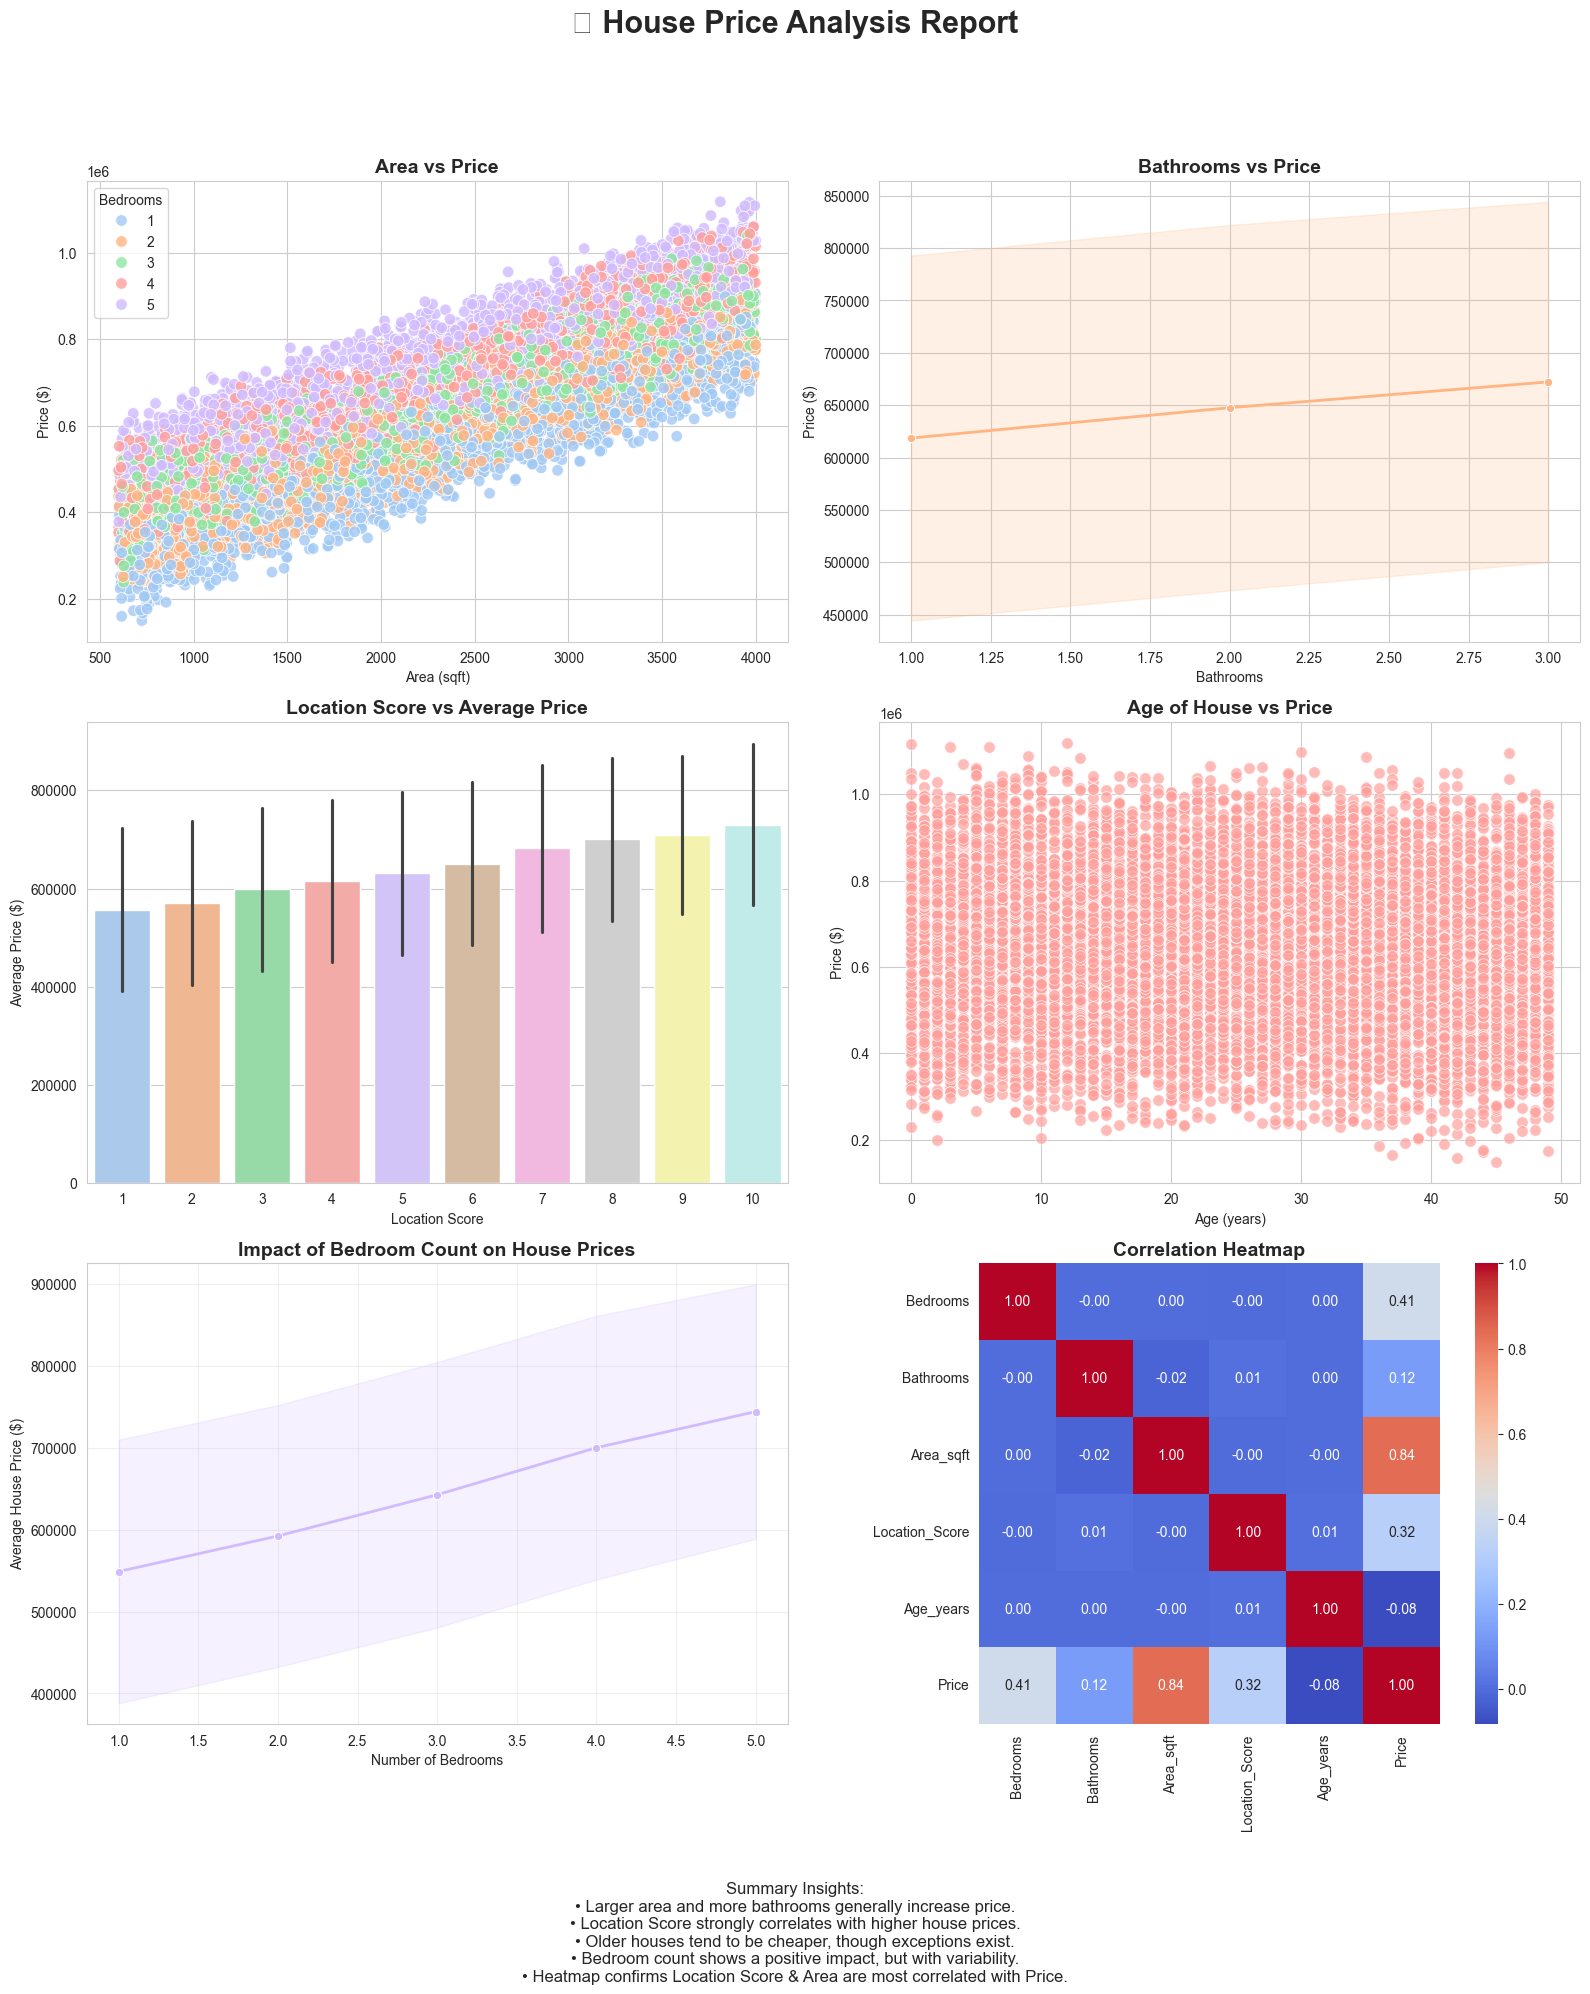

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
pastel = sns.color_palette("pastel")

# Create figure with 3x2 layout
fig, axs = plt.subplots(3, 2, figsize=(16,18))
fig.suptitle("📊 House Price Analysis Report", fontsize=22, weight="bold", y=1.02)

# 1. Area vs Price (Scatter, color by Bedrooms)
sns.scatterplot(
    data=df, 
    x='Area_sqft', 
    y='Price', 
    hue='Bedrooms', 
    palette=pastel, 
    alpha=0.8, 
    s=70, 
    ax=axs[0,0]
)
axs[0,0].set_title("Area vs Price", fontsize=14, weight="bold")
axs[0,0].set_xlabel("Area (sqft)")
axs[0,0].set_ylabel("Price ($)")

# 2. Bathrooms vs Price (Line)
sns.lineplot(
    data=df, 
    x='Bathrooms', 
    y='Price', 
    marker='o', 
    linewidth=2, 
    color=pastel[1], 
    ci='sd',
    ax=axs[0,1]
)
axs[0,1].set_title("Bathrooms vs Price", fontsize=14, weight="bold")
axs[0,1].set_xlabel("Bathrooms")
axs[0,1].set_ylabel("Price ($)")

# 3. Location Score vs Price (Bar Chart)
sns.barplot(
    data=df, 
    x='Location_Score', 
    y='Price', 
    palette=pastel, 
    ci="sd",   
    ax=axs[1,0]
)
axs[1,0].set_title("Location Score vs Average Price", fontsize=14, weight="bold")
axs[1,0].set_xlabel("Location Score")
axs[1,0].set_ylabel("Average Price ($)")

# 4. Age vs Price (Scatter)
sns.scatterplot(
    data=df, 
    x='Age_years', 
    y='Price', 
    color=pastel[3], 
    alpha=0.7, 
    s=70, 
    ax=axs[1,1]
)
axs[1,1].set_title("Age of House vs Price", fontsize=14, weight="bold")
axs[1,1].set_xlabel("Age (years)")
axs[1,1].set_ylabel("Price ($)")

# 5. Bedroom Count vs Price (Line with CI)
sns.lineplot(
    data=df, 
    x='Bedrooms', 
    y='Price', 
    marker='o',       
    ci='sd',          
    linewidth=2, 
    color=pastel[4],
    ax=axs[2,0]
)
axs[2,0].set_title("Impact of Bedroom Count on House Prices", fontsize=14, weight="bold")
axs[2,0].set_xlabel("Number of Bedrooms")
axs[2,0].set_ylabel("Average House Price ($)")
axs[2,0].grid(alpha=0.3)

# 6. Correlation Heatmap (extra EDA)
corr = df.corr(numeric_only=True)
sns.heatmap(
    corr, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    cbar=True, 
    square=True,
    ax=axs[2,1]
)
axs[2,1].set_title("Correlation Heatmap", fontsize=14, weight="bold")

# Adjust layout
plt.tight_layout(rect=[0,0,1,0.97])

# Add report-style comments at bottom
fig.text(
    0.5, -0.02,
    "Summary Insights:\n"
    "• Larger area and more bathrooms generally increase price.\n"
    "• Location Score strongly correlates with higher house prices.\n"
    "• Older houses tend to be cheaper, though exceptions exist.\n"
    "• Bedroom count shows a positive impact, but with variability.\n"
    "• Heatmap confirms Location Score & Area are most correlated with Price.",
    ha="center", va="top", fontsize=12
)
plt.savefig('assets/Report.png')

plt.show()


## 4. Selecting the correct algorithm

<p align="center">
<img src='assets/ml_map.svg' alt='ML Map' width='500'/>
<p/>
We're gonna use `Linear Regression Model` for now because that is the project's requirement

## 5. Training the Model

In [17]:
# Splitting into x and y as well as train and test variables for each
x=df[['Bedrooms','Bathrooms','Area_sqft','Location_Score','Age_years']]
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
# Actually training the model now...
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 6. Test the Model in Practice

In [19]:
# Store predictions in variable
y_pred=model.predict(x_test)
y_test,y_pred

(1982    683263
 6514    765175
 4120    654059
 869     443005
 7452    260030
          ...  
 7233    372638
 5236    511484
 9918    283096
 6650    328884
 8587    251616
 Name: Price, Length: 2000, dtype: int64,
 array([681192.8914231 , 757540.13428059, 646325.6308683 , ...,
        297929.01852212, 310970.56907633, 257090.59534686], shape=(2000,)))

## 7. Evaluating the model

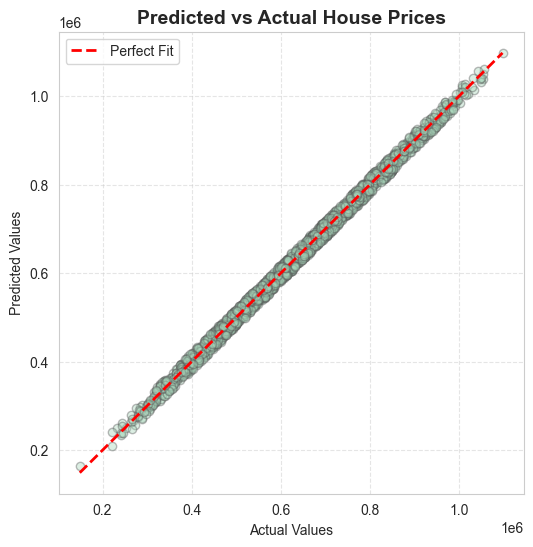

In [52]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4, color="#A8D5BA", edgecolor="#555555")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.title("Predicted vs Actual House Prices", fontsize=14, fontweight="bold")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.savefig('assets/Predicted_vs_actual.png')

plt.show()


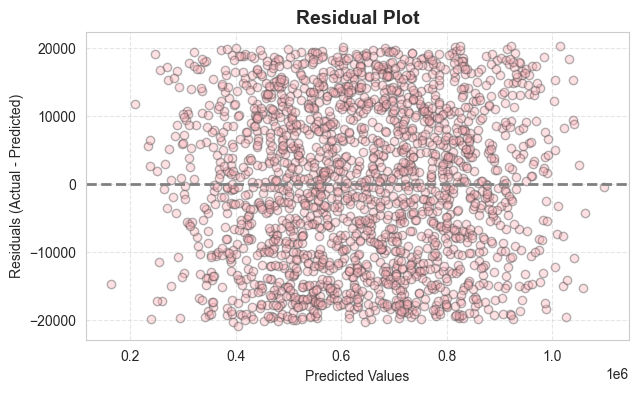

In [51]:
residuals = y_test.values - y_pred
plt.figure(figsize=(7,4))
plt.scatter(y_pred, residuals, alpha=0.4, color="#FFB3BA", edgecolor="#444444")
plt.axhline(y=0, color="gray", linestyle="--", lw=2)
plt.title("Residual Plot", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [26]:
print("Coeffiecients:", model.coef_)
print("intercept:",model.intercept_)

Coeffiecients: [50007.90831043 30170.73033072   149.8862263  19998.56810338
 -1018.90251975]
intercept: 544.1253433132078


In [28]:
print("R^2 Score:",r2_score(y_test,y_pred))

R^2 Score: 0.9955984894160915


In [30]:
print("RMSE:",mean_squared_error(y_test,y_pred))

RMSE: 135419577.79096153


## Testing all models and choosing the best one

In [34]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



# List of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

results = []

# Train & evaluate all models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    results.append((name, r2, rmse))

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R2_Score", "RMSE"])
results_df = results_df.sort_values(by="R2_Score", ascending=False)

print(results_df)

# Select best model
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")


               Model  R2_Score          RMSE
1              Ridge  0.995599  1.354133e+08
2              Lasso  0.995599  1.354184e+08
0  Linear Regression  0.995598  1.354196e+08
5  Gradient Boosting  0.993614  1.964630e+08
4      Random Forest  0.990444  2.940118e+08
3      Decision Tree  0.974993  7.693821e+08
6                SVR  0.009114  3.048621e+10

Best Model: Ridge


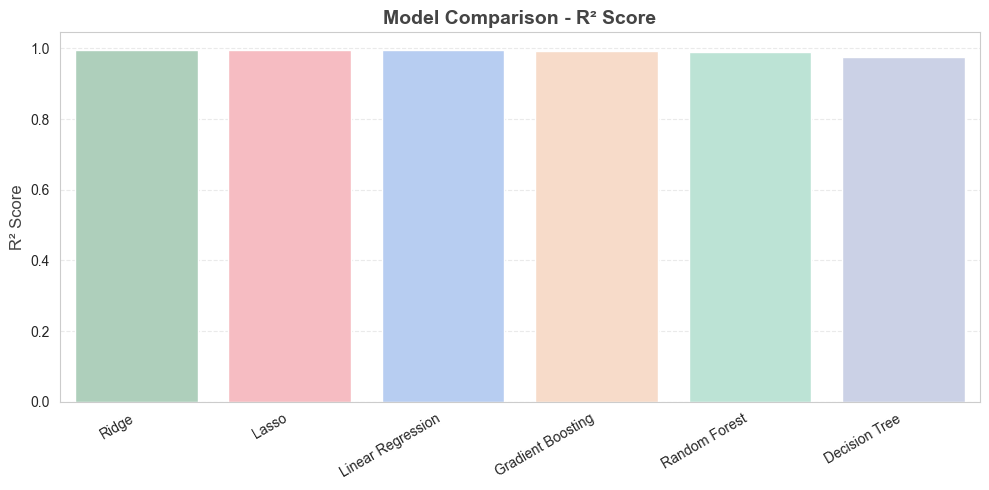

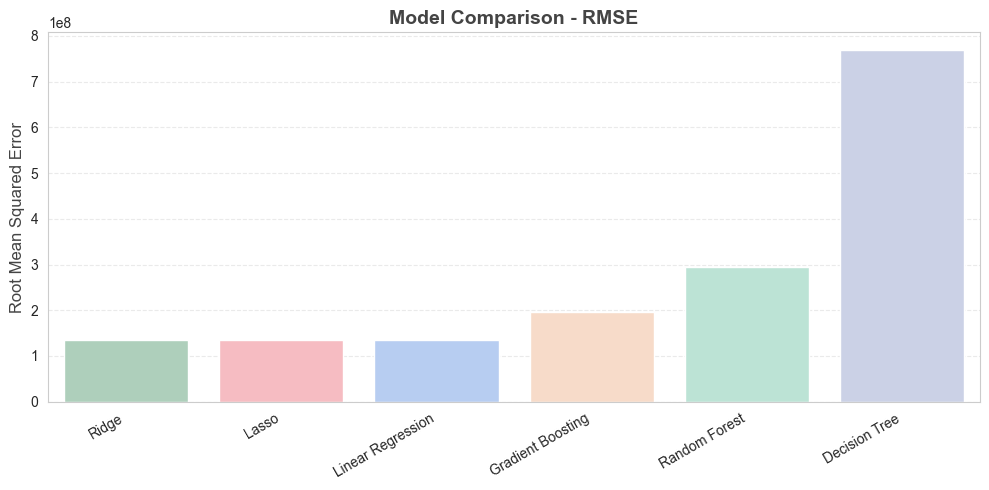

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a pastel palette
pastel_colors = ["#A8D5BA", "#FFB3BA", "#AECBFA", "#FFDAC1", "#B5EAD7", "#C7CEEA"]

# Barplot of R² Scores
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R2_Score", data=results_df, palette=pastel_colors)
plt.xticks(rotation=30, ha="right")
plt.title("Model Comparison - R² Score", fontsize=14, fontweight="bold", color="#444444")
plt.ylabel("R² Score", fontsize=12, color="#444444")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig('assets/Model_Compare_R^2.png')
plt.show()

# Barplot of RMSE
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="RMSE", data=results_df, palette=pastel_colors)
plt.xticks(rotation=30, ha="right")
plt.title("Model Comparison - RMSE", fontsize=14, fontweight="bold", color="#444444")
plt.ylabel("Root Mean Squared Error", fontsize=12, color="#444444")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig('assets/Model_Compare_RMSE.png')
plt.show()


In [ ]:
# Removing SVR as it throws the rest off perspective

In [35]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



# List of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

# Train & evaluate all models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    results.append((name, r2, rmse))

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R2_Score", "RMSE"])
results_df = results_df.sort_values(by="R2_Score", ascending=False)

print(results_df)

# Select best model
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")


               Model  R2_Score          RMSE
1              Ridge  0.995599  1.354133e+08
2              Lasso  0.995599  1.354184e+08
0  Linear Regression  0.995598  1.354196e+08
5  Gradient Boosting  0.993614  1.964630e+08
4      Random Forest  0.990444  2.940118e+08
3      Decision Tree  0.974993  7.693821e+08

Best Model: Ridge


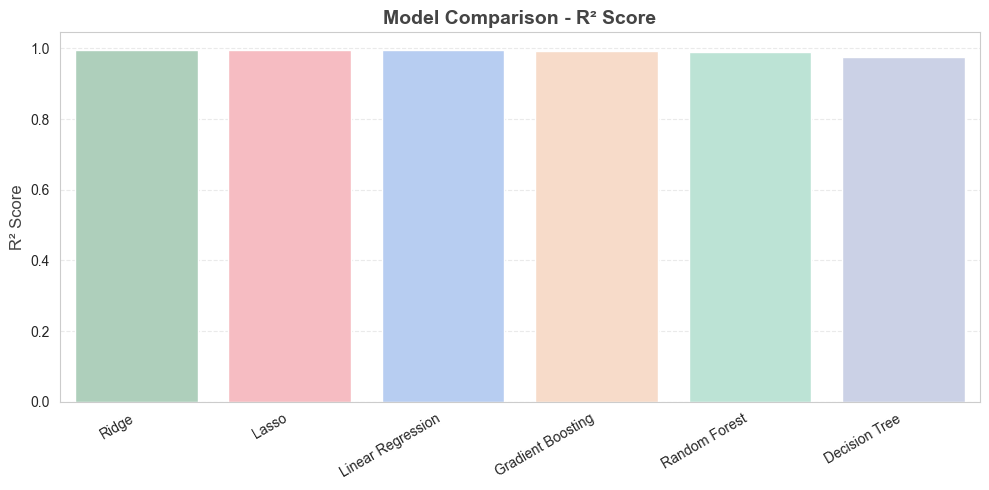

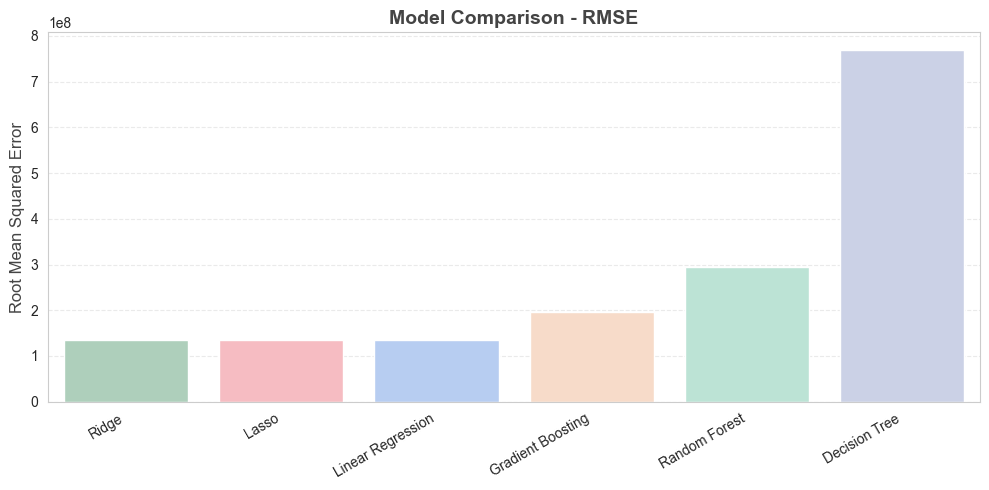

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a pastel palette
pastel_colors = ["#A8D5BA", "#FFB3BA", "#AECBFA", "#FFDAC1", "#B5EAD7", "#C7CEEA"]

# Barplot of R² Scores
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R2_Score", data=results_df, palette=pastel_colors)
plt.xticks(rotation=30, ha="right")
plt.title("Model Comparison - R² Score", fontsize=14, fontweight="bold", color="#444444")
plt.ylabel("R² Score", fontsize=12, color="#444444")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig('assets/Model_Compare_R^2.png')
plt.show()

# Barplot of RMSE
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="RMSE", data=results_df, palette=pastel_colors)
plt.xticks(rotation=30, ha="right")
plt.title("Model Comparison - RMSE", fontsize=14, fontweight="bold", color="#444444")
plt.ylabel("Root Mean Squared Error", fontsize=12, color="#444444")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig('assets/Model_Compare_RMSE.png')
plt.show()


## Ridge Model 

In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

# --------------------
# 1. Split Data
# --------------------
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# --------------------
# 2. Train Ridge Model
# --------------------
ridge = Ridge(alpha=1.0, random_state=42)   # you can tune alpha later
ridge.fit(x_train, y_train)

# --------------------
# 3. Predictions & Evaluation
# --------------------
y_pred = ridge.predict(x_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 4))
print("MAE:", round(mae, 4))

# --------------------
# 4. Cross-validation (Optional)
# --------------------
cv_scores = cross_val_score(ridge, x, y, cv=5, scoring="r2")
print("Cross-validated R² scores:", cv_scores)
print("Mean CV R²:", round(cv_scores.mean(), 4))

# --------------------
# 5. Save Model
# --------------------
joblib.dump(ridge, "ridge_model.pkl")
print("✅ Ridge model saved as ridge_model.pkl")

# --------------------
# 6. Load Model Later
# --------------------
loaded_ridge = joblib.load("ridge_model.pkl")
print("Loaded model R² on test set:", round(r2_score(y_test, loaded_ridge.predict(x_test)), 4))


R² Score: 0.9955
RMSE: 11638.9012
MAE: 10045.8008
Cross-validated R² scores: [0.99568687 0.99555091 0.9955838  0.99575893 0.99574139]
Mean CV R²: 0.9957
✅ Ridge model saved as ridge_model.pkl
Loaded model R² on test set: 0.9955
